### Motivation
1. Taking advantage of the amount of data that is available nowadays, the authors performed statistical analysis and machine learning to extract knowledge in the current situation of financial inclusion and the factors affecting it. By applying advanced machine learning algorithms to the financial inclusion dataset to predict a person’s likelihood of having a bank account. This would enable the financial institutions to get an understanding of what features make a person capable of having a bank account. Having all that reliable information or guidance, financial institutions can take considerable measures and create a system or come up with a strategy that will help make all members of the society (regardless of class or gender) aware of financial inclusion and its benefits.



In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc, precision_recall_curve

warnings.filterwarnings("ignore")
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
)
# import classification algorithm
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression
# evaluation matrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    plot_confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
# import preprocessing module
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

plt.style.use('ggplot')

In [2]:
# Sed set up
import numpy as np
from numpy import random

random.seed(42)
SEED = np.random.seed(42)

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("Train_v2.csv")
test = pd.read_csv("Test_v2.csv")
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


# Explolatory Data Analysis
*This is the process of finding some insights from you dataset before create predictive models.*

Note: This is important steps in your Data science workflow.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


## Let see the statistical overview of our dataset

In [7]:
# describe will show statistical info
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


From the above cell we can see that most of our features are categorical because ony 3 columns are numerical that's why it shows only those 3 with the mean, count, standard deviation also the minimum value of each columns the maximum value of each columns along with the interquartile range

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


From this info method we got to know more about our data it first show us the number of non null count als the datatype of each columns along with the total number of each datatypes we have. It shows here that we have 3 features with *int* dataypte and 10 *objects* datatype also it tell us about the size of the file we have which is in our case 2.3MB

In [9]:
# to show the shape of the data
train.shape

(23524, 13)

In [10]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

### Target Distribution

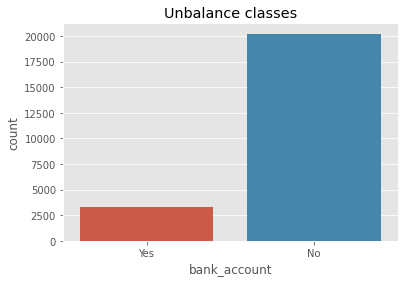

In [11]:
plt.title("Unbalance classes")
sns.countplot(x="bank_account", data=train)
plt.show()

From the above cell we can see that we have unbalanced data basically the number of No is much higher than the number of yes which can lead to poor model performence sometimes. In this can we've about 2500 yes and 20000 No which gives us a big difference later on we will what we can do for this .

### Let's see missing data

<AxesSubplot:>

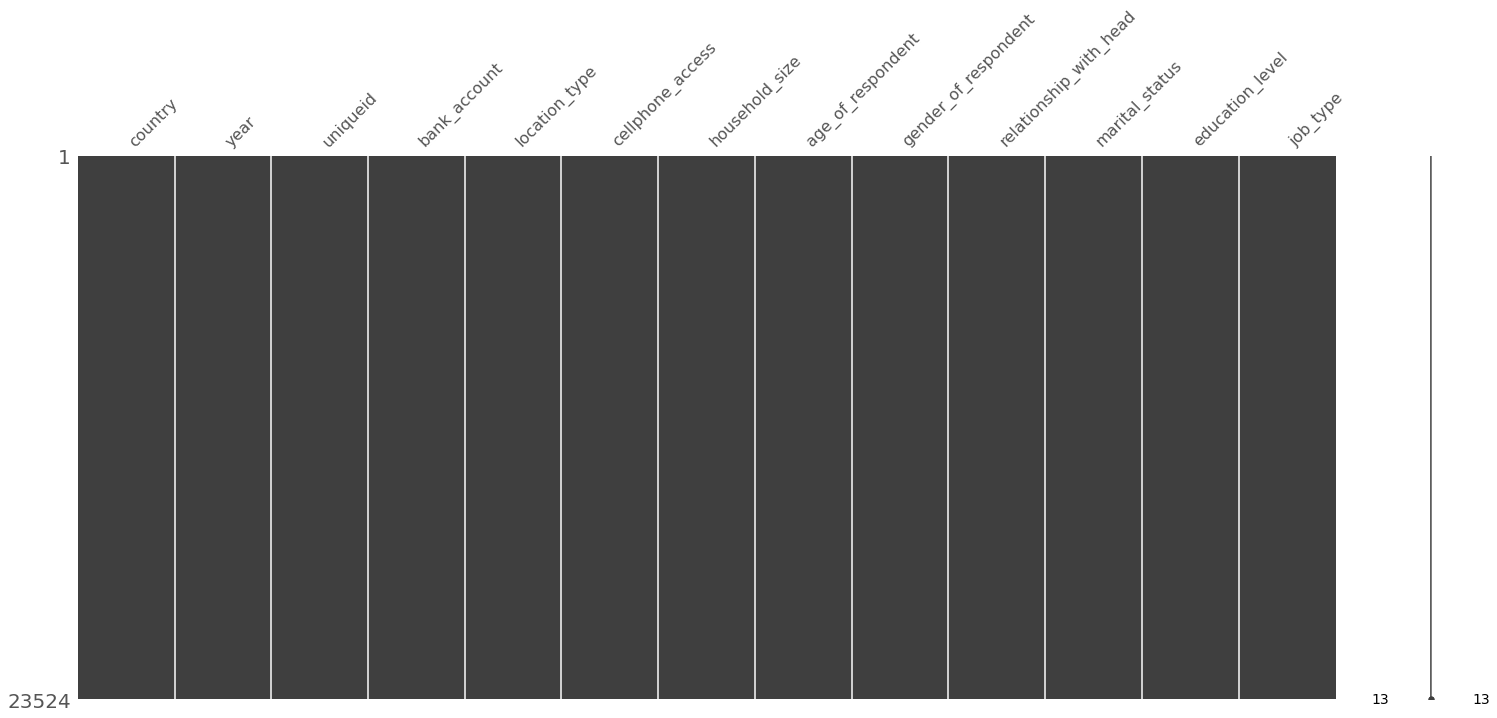

In [12]:
import missingno as mn

mn.matrix(train)

It shows that we don't have any missing values which is good

### Let's see the disctribution of the people with cellphone based on gender.

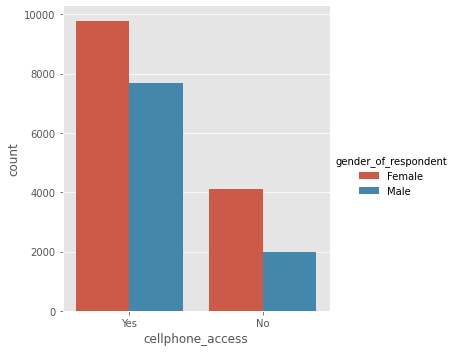

In [13]:
sns.catplot(x="cellphone_access", data=train, kind="count", hue="gender_of_respondent")
plt.show()

This shows that number of male having cellphones is higher than the numbero female in this case.

## Let's see the distribution of age

<AxesSubplot:xlabel='age_of_respondent', ylabel='Density'>

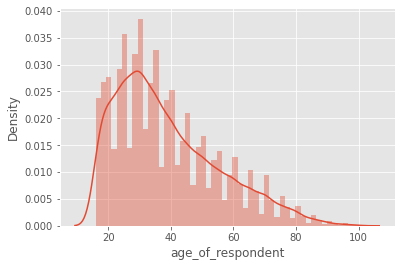

In [14]:
sns.distplot(train.age_of_respondent)

This distribution make sense because we have age range from 16 years old to 100 year

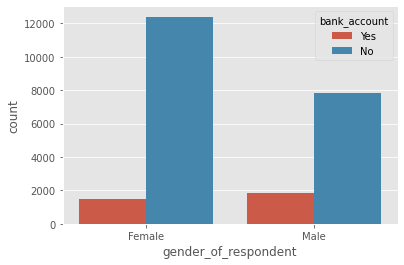

In [15]:
# Distribution of the gender
sns.countplot(train.gender_of_respondent, hue="bank_account", data=train)
plt.show()

we can see that the number of female that have bank account is higher than the number of male with a bank account. 

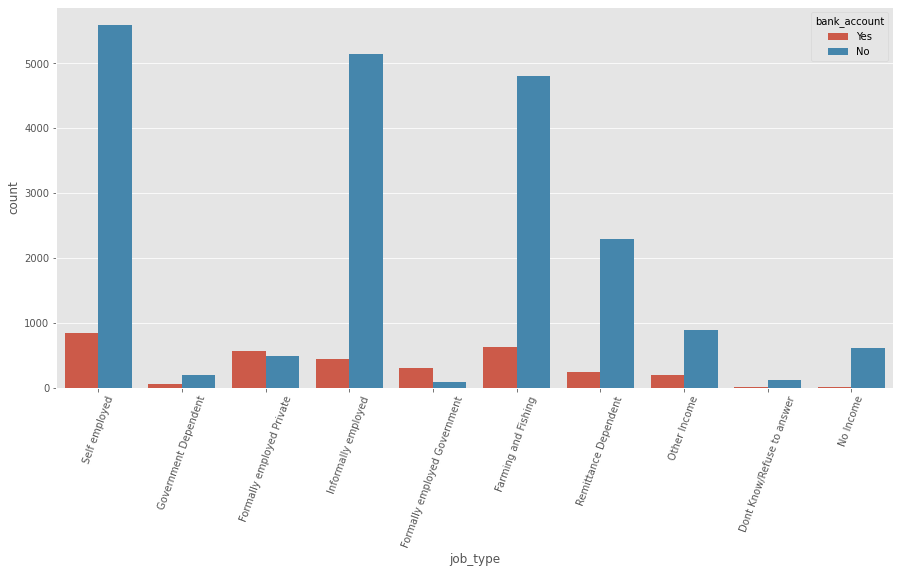

In [16]:
# distribution of job type
plt.figure(figsize=(15, 7))
sns.countplot(train.job_type, orient="h", hue="bank_account", data=train)
labels = [
    "Self employed",
    "Government Dependent",
    "Formally employed Private",
    "Informally employed",
    "Formally employed Government",
    "Farming and Fishing",
    "Remittance Dependent",
    "Other Income",
    "Dont Know/Refuse to answer",
    "No Income",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=70);

we can see from the above graph the the people who are self employed and farming and fishing are those who are more likely to have bank account as compare to the those who work for the Government or other income. 
We can notice also those who don't have no Income and does who reuse to answer don't have high chance of having bank account.

<AxesSubplot:xlabel='location_type', ylabel='count'>

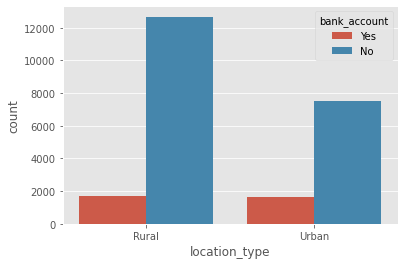

In [17]:
# Distribution of the location based on account
sns.countplot(train.location_type, hue="bank_account", data=train)

We can see that people in Urban area is have more chance to have bank_account than those who are in Rural area although we can see also the number people in Rural area is higher.

<AxesSubplot:xlabel='household_size', ylabel='count'>

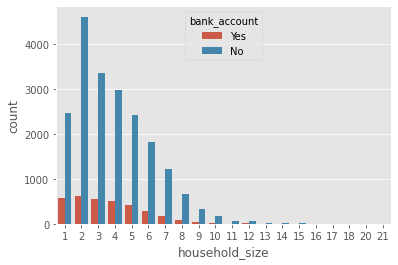

In [18]:
# Distirbution of the household_size
sns.countplot(train.household_size, hue="bank_account", data=train)

## How many people have cellphone

In [19]:
train.cellphone_access.value_counts()[0]

17454

we can see that the number of people who have cellphone access is 17454 which is more than the half which make more sense in this case

### How many types of education do the dataset has?

In [20]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

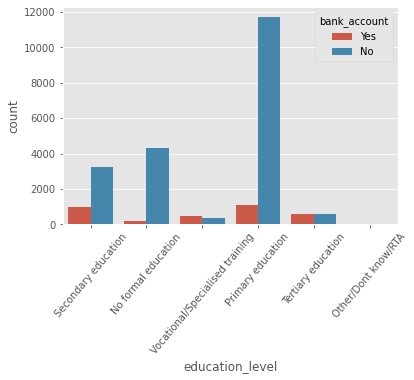

In [21]:
sns.countplot(train.education_level, hue="bank_account", data=train)
labels = [
    "Secondary education",
    "No formal education",
    "Vocational/Specialised training",
    "Primary education",
    "Tertiary education",
    "Other/Dont know/RTA",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

we can see that the vocational/ specialised training is the majority in this case and we have few people with No formal education

In [22]:
train.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

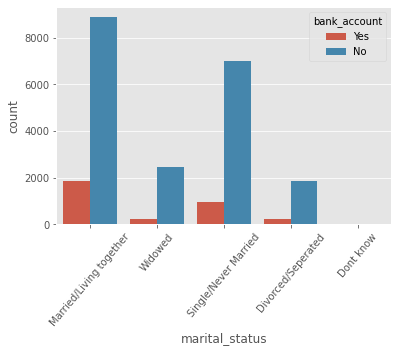

In [23]:
sns.countplot(train.marital_status, hue="bank_account", data=train)
labels = [
    "Married/Living together",
    "Widowed",
    "Single/Never Married",
    "Divorced/Seperated",
    "Dont know",
]
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

This shows that people who are married and living together are more likely to have a bank account as compare to ther slike single or divorced

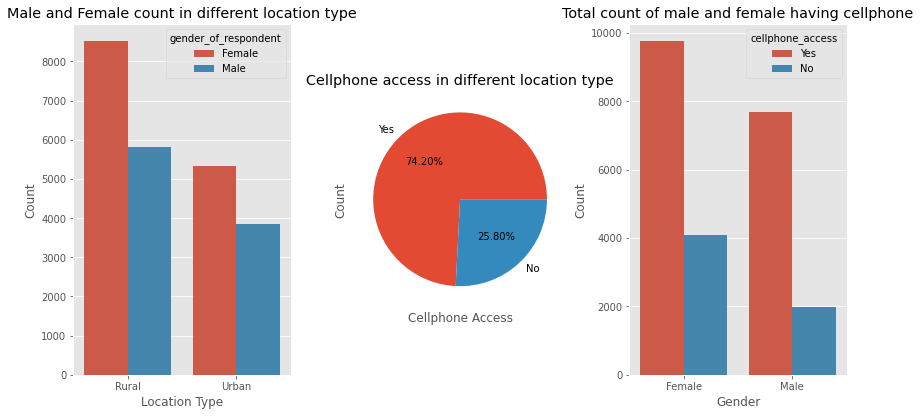

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (12, 6))
fig.tight_layout(pad = 3)

sns.countplot(x = 'location_type', hue = 'gender_of_respondent', data = train, ax = ax1)
ax1.set_title("Male and Female count in different location type")
ax1.set_xlabel("Location Type")
ax1.set_ylabel("Count")

# sns.countplot(x = 'cellphone_access', hue = 'location_type', data = data_train, ax = ax2)
cellphone = ['Yes', 'No']
cellphone_access = train['cellphone_access'].value_counts()
ax2.pie(cellphone_access, labels = cellphone, autopct='%1.2f%%', normalize = True)
ax2.set_title("Cellphone access in different location type")
ax2.set_xlabel("Cellphone Access")
ax2.set_ylabel("Count")

sns.countplot(x = 'gender_of_respondent', hue = 'cellphone_access', data = train, ax = ax3)
ax3.set_title("Total count of male and female having cellphone")
ax3.set_xlabel("Gender")
ax3.set_ylabel("Count");

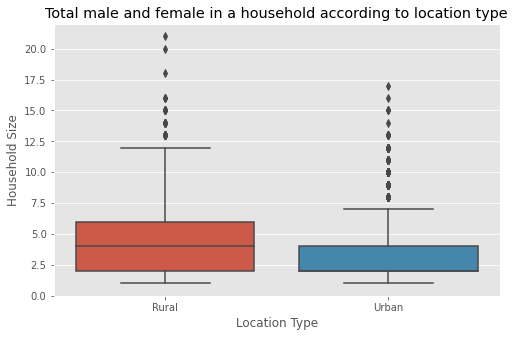

In [25]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'location_type', y = 'household_size', data = train, )
plt.title("Total male and female in a household according to location type")
plt.xlabel("Location Type")
plt.ylabel("Household Size");

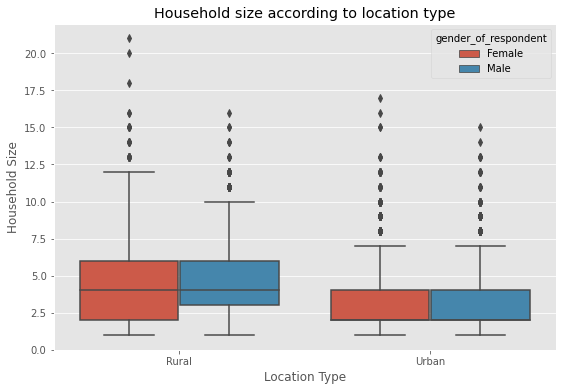

In [26]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'location_type', y = 'household_size',hue = 'gender_of_respondent', data = train)
plt.title("Household size according to location type")
plt.xlabel("Location Type")
plt.ylabel("Household Size");

In [27]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [28]:
# Convert target label to numerical Data
le = LabelEncoder()
train["bank_account"] = le.fit_transform(train["bank_account"])

# Separate training features from target
X_train = train.drop(["bank_account"], axis=1)
y_train = train["bank_account"]

In [29]:
train["country+location"] = train["country"] + train["location_type"]
train["location+cellphone_access"] = train["location_type"] + train["cellphone_access"]
train["gender+cellphone_access"] = (
    train["gender_of_respondent"] + train["cellphone_access"]
)
train["country+cellphone_access"] = train["country"] + train["cellphone_access"]

In [30]:
test["country+location"] = test["country"] + test["location_type"]
test["location+cellphone_access"] = test["location_type"] + test["cellphone_access"]
test["gender+cellphone_access"] = (
    test["gender_of_respondent"] + test["cellphone_access"]
)
test["country+cellphone_access"] = test["country"] + test["cellphone_access"]

In [31]:
df = train.drop(["uniqueid", "year"], 1)

In [32]:
col_test = test.uniqueid
test = test.drop("uniqueid", 1)

In [33]:
test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,KenyaUrban,UrbanYes,MaleYes,KenyaYes
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,KenyaUrban,UrbanYes,MaleYes,KenyaYes
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [34]:
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country+location,location+cellphone_access,gender+cellphone_access,country+cellphone_access
0,Kenya,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,KenyaRural,RuralYes,FemaleYes,KenyaYes
1,Kenya,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,KenyaRural,RuralNo,FemaleNo,KenyaNo
2,Kenya,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,KenyaUrban,UrbanYes,MaleYes,KenyaYes
3,Kenya,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,KenyaRural,RuralYes,FemaleYes,KenyaYes
4,Kenya,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,KenyaUrban,UrbanNo,MaleNo,KenyaNo


In [35]:
df = pd.get_dummies(df)
df.head()

,bank_account,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,...,gender+cellphone_access_MaleNo,gender+cellphone_access_MaleYes,country+cellphone_access_KenyaNo,country+cellphone_access_KenyaYes,country+cellphone_access_RwandaNo,country+cellphone_access_RwandaYes,country+cellphone_access_TanzaniaNo,country+cellphone_access_TanzaniaYes,country+cellphone_access_UgandaNo,country+cellphone_access_UgandaYes
0,1,3,24,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5,70,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,5,26,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,5,34,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,8,26,1,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0


In [36]:
test = pd.get_dummies(test)

In [37]:
train.loc[:, 'household_size':'age_of_respondent'].describe().T.style.bar(subset=['mean'], color='#206ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
household_size,23524.000000,3.797483,2.227613,1.000000,2.000000,3.000000,5.000000,21.000000
age_of_respondent,23524.000000,38.805220,16.520569,16.000000,26.000000,35.000000,49.000000,100.000000


In [38]:
df.shape, test.shape

((23524, 64), (10086, 64))

In [39]:
df.corr()["bank_account"]

bank_account                            1.000000
household_size                         -0.028326
age_of_respondent                       0.019429
country_Kenya                           0.186242
country_Rwanda                         -0.057378
                                          ...   
country+cellphone_access_RwandaYes     -0.009689
country+cellphone_access_TanzaniaNo    -0.139647
country+cellphone_access_TanzaniaYes    0.012099
country+cellphone_access_UgandaNo      -0.060003
country+cellphone_access_UgandaYes     -0.017768
Name: bank_account, Length: 64, dtype: float64

<AxesSubplot:ylabel='Frequency'>

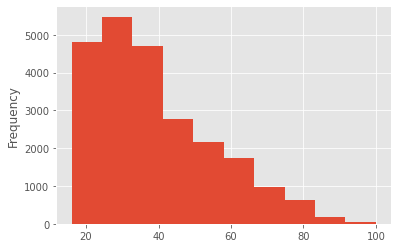

In [40]:
df.age_of_respondent.plot(kind="hist")

In [41]:
X = df.drop(["bank_account"], 1)
y = df.bank_account.values

In [42]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:title={'center':'Balanced classes'}, ylabel='count'>

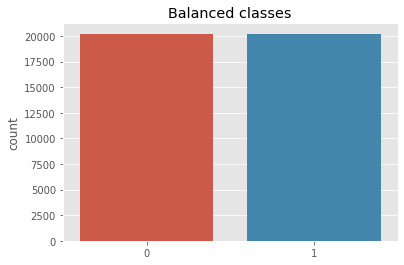

In [43]:
oversample = SMOTE()
# Oversampling the target data
X, y = oversample.fit_resample(X, y)
plt.title("Balanced classes")
sns.countplot(y)

## Trying Different Algorithms from Sklearn

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=SEED, test_size=0.1, stratify=y
)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
models = {
    "XGB": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier(),
    "DTC": DecisionTreeClassifier(),
    "HGB": HistGradientBoostingClassifier(),
    "ADB": AdaBoostClassifier(),
}


for model_name, model in models.items():
    print("Train {}".format(model_name))
    # cross_val_score for each classifier
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1")

    print("List of scores for {}: {}".format(model_name, scores))
    print("The mean score for {}: {}".format(model_name, scores.mean()))
    print("-------------The End------------------")

Train XGB
[00:20:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:20:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

### XGBoost

In [47]:
xgb = XGBClassifier(
    n_estimators=200,
    random_state=SEED,
    use_label_encoder=False,
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb)
precision_score_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)

[00:25:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
print(f"XGBoost Accuracy of xgb: {accuracy_score_xgb}")
print(f"precision of xgb: {precision_score_xgb}")
print(f"recall of xgb: {recall_xgb}")
print(f"f1 of xgb: {f1_xgb}")

XGBoost Accuracy of xgb: 0.9116992332426416
precision of xgb: 0.9306418219461697
recall of xgb: 0.8896585848589807
f1 of xgb: 0.9096888439160131


#### Classification report and confusion matrix for Xgboost

In [49]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2022
           1       0.93      0.89      0.91      2021

    accuracy                           0.91      4043
   macro avg       0.91      0.91      0.91      4043
weighted avg       0.91      0.91      0.91      4043



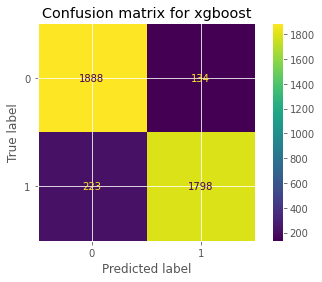

In [50]:
plot_confusion_matrix(xgb, X_test, y_test)
plt.title("Confusion matrix for xgboost")
plt.show()

### KNN

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn)
precision_score_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)

In [52]:
print(f"Accuracy of knn: {accuracy_score_knn}")
print(f"precision of knn: {precision_score_knn}")
print(f"f1 of knn: {f1_knn}")
print(f"recall of knn: {recall_knn}")

Accuracy of knn: 0.9077417759089785
precision of knn: 0.9047151277013753
f1 of knn: 0.9080601429627805
recall of knn: 0.9114299851558635


#### Classification report and confusion matrix for KNN

In [53]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2022
           1       0.90      0.91      0.91      2021

    accuracy                           0.91      4043
   macro avg       0.91      0.91      0.91      4043
weighted avg       0.91      0.91      0.91      4043



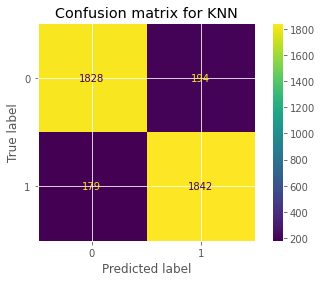

In [54]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title("Confusion matrix for KNN")
plt.show()

### Random Forest

In [55]:
rfc = RandomForestClassifier(
    n_estimators=200,
    random_state=SEED,
)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

f1_rfc = f1_score(y_test, y_pred_rfc)
precision_score_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)

In [56]:
print(f"Accuracy of rfc: {accuracy_score_rfc}")
print(f"precision of rfc: {precision_score_rfc}")
print(f"f1 of rfc: {f1_rfc}")
print(f"recall of rfc: {recall_rfc}")

Accuracy of rfc: 0.9154093494929508
precision of rfc: 0.9137506160670281
f1 of rfc: 0.9155555555555556
recall of rfc: 0.917367639782286


### Classificaion report and confusion matrix for Random Forest

In [57]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2022
           1       0.91      0.92      0.92      2021

    accuracy                           0.92      4043
   macro avg       0.92      0.92      0.92      4043
weighted avg       0.92      0.92      0.92      4043



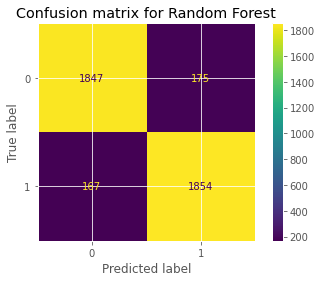

In [58]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.title("Confusion matrix for Random Forest")
plt.show()

### Logistic Regression

In [59]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

f1_lg = f1_score(y_test, y_pred_lg)
precision_score_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
accuracy_score_lg = accuracy_score(y_test, y_pred_lg)

In [60]:
print(f"Accuracy of lg: {accuracy_score_lg}")
print(f"precision of lg: {precision_score_lg}")
print(f"f1 of lg: {f1_lg}")
print(f"recall of lg: {recall_lg}")

Accuracy of lg: 0.8990848379915904
precision of lg: 0.9468144044321329
f1 of lg: 0.8933612127548353
recall of lg: 0.8456209797130133


### Classification report and confusion matrix for Logistic Regression

In [61]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2022
           1       0.95      0.85      0.89      2021

    accuracy                           0.90      4043
   macro avg       0.90      0.90      0.90      4043
weighted avg       0.90      0.90      0.90      4043



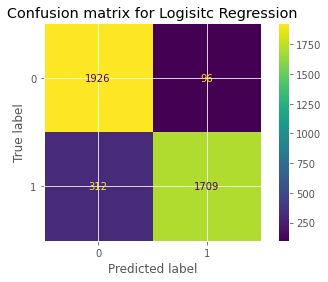

In [62]:
plot_confusion_matrix(lg, X_test, y_test)
plt.title("Confusion matrix for Logisitc Regression")
plt.show()

# Gradient Boosting classifier

In [63]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=SEED)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

f1_gbc = f1_score(y_test, y_pred_gbc)
precision_score_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
accuracy_score_gbc = accuracy_score(y_test, y_pred_gbc)

In [64]:
print(f"Accuracy of gbc: {accuracy_score_gbc}")
print(f"precision of gbc: {precision_score_gbc}")
print(f"f1 of gbc: {f1_gbc}")
print(f"recall of gbc: {recall_gbc}")

Accuracy of gbc: 0.8943853574078654
precision of gbc: 0.923936170212766
f1 of gbc: 0.8905408869520637
recall of gbc: 0.859475507174666


### Confusion matrix and classification report for Gradient boosting

In [65]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2022
           1       0.92      0.86      0.89      2021

    accuracy                           0.89      4043
   macro avg       0.90      0.89      0.89      4043
weighted avg       0.90      0.89      0.89      4043



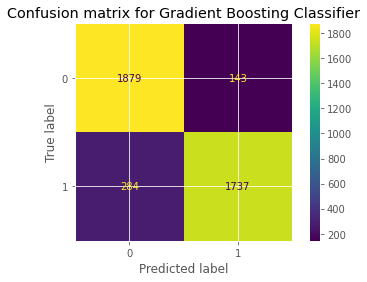

In [66]:
plot_confusion_matrix(gbc, X_test, y_test)
plt.title("Confusion matrix for Gradient Boosting Classifier")
plt.show()

### Decision Tree

In [67]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

f1_dt = f1_score(y_test, y_pred_dt)
precision_score_dt = precision_score(y_test, y_pred_dt)
recall_df = recall_score(y_test, y_pred_dt)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

In [68]:
print(f"Accuracy of dt: {accuracy_score_dt}")
print(f"precision of dt: {precision_score_dt}")
print(f"f1 of dt: {f1_dt}")
print(f"recall of df: {recall_df}")

Accuracy of dt: 0.8988374969082364
precision of dt: 0.8954857703631011
f1 of dt: 0.8992362650899236
recall of df: 0.9030183077684315


### Classificaiton report and confusion matrix for Decison tree

In [69]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2022
           1       0.90      0.90      0.90      2021

    accuracy                           0.90      4043
   macro avg       0.90      0.90      0.90      4043
weighted avg       0.90      0.90      0.90      4043



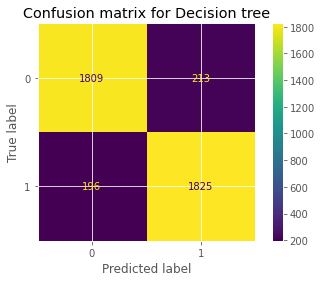

In [70]:
plot_confusion_matrix(dt, X_test, y_test)
plt.title("Confusion matrix for Decision tree")
plt.show()

### Histogram-based Gradient Boosting

In [71]:
hg = HistGradientBoostingClassifier(random_state=SEED)
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

f1_hg = f1_score(y_test, y_pred_hg)
precision_score_hg = precision_score(y_test, y_pred_hg)
recall_hg = recall_score(y_test, y_pred_hg)
accuracy_score_hg = accuracy_score(y_test, y_pred_hg)

In [72]:
print(f"Accuracy of hg: {accuracy_score_hg}")
print(f"precision of hg: {precision_score_hg}")
print(f"f1 of hg: {f1_hg}")
print(f"recall of hg : {recall_hg}")

Accuracy of hg: 0.9126885975760574
precision of hg: 0.9384858044164038
f1 of hg: 0.9100178434871273
recall of hg : 0.8832261256803563


In [73]:
print(classification_report(y_test, y_pred_hg))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2022
           1       0.94      0.88      0.91      2021

    accuracy                           0.91      4043
   macro avg       0.91      0.91      0.91      4043
weighted avg       0.91      0.91      0.91      4043



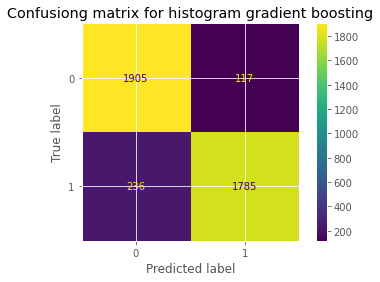

In [74]:
plot_confusion_matrix(hg,X_test, y_test)
plt.title("Confusiong matrix for histogram gradient boosting")
plt.show()

### Adaboost

In [75]:
adb = AdaBoostClassifier(random_state=SEED)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

f1_adb = f1_score(y_test, y_pred_adb)
precision_score_adb = precision_score(y_test, y_pred_adb)
recall_adb = recall_score(y_test, y_pred_adb)
accuracy_score_adb = accuracy_score(y_test, y_pred_adb)

print(f"Accuracy of adb: {accuracy_score_adb}")
print(f"precision of adb: {precision_score_adb}")
print(f"f1 of adb: {f1_adb}")
print(f"recall of adb : {recall_adb}")

Accuracy of adb: 0.8706406134058867
precision of adb: 0.8954593453009504
f1 of adb: 0.866411238825032
recall of adb : 0.839188520534389


In [76]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2022
           1       0.90      0.84      0.87      2021

    accuracy                           0.87      4043
   macro avg       0.87      0.87      0.87      4043
weighted avg       0.87      0.87      0.87      4043



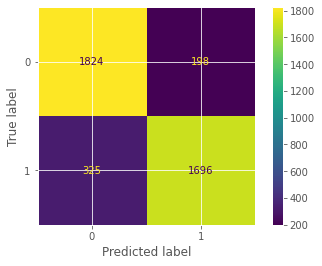

In [77]:
plot_confusion_matrix(adb,X_test, y_test)
plt.show()

## Table of evaluation matrics

In [78]:
scores = pd.DataFrame(
    {
        "Algoritm": [
            "Logistc Regression",
            "XGB",
            "Random Forest",
            "Gradient Boosting",
            "Decision tree",
            "KNN",
            "Historgam Gradient Boosting",
            "Adaboost",
        ],
        "Accuracy": [
            accuracy_score_lg,
            accuracy_score_xgb,
            accuracy_score_rfc,
            accuracy_score_gbc,
            accuracy_score_dt,
            accuracy_score_knn,
            accuracy_score_hg,
            accuracy_score_adb,
        ],
        "F1 score": [
            f1_lg,
            f1_xgb,
            f1_rfc,
            f1_gbc,
            f1_dt,
            f1_knn,
            f1_hg,
            f1_adb,
        ],
        "Precision": [
            precision_score_lg,
            precision_score_xgb,
            precision_score_rfc,
            precision_score_gbc,
            precision_score_dt,
            precision_score_knn,
            precision_score_hg,
            precision_score_adb,
        ],
        "Recall": [
            recall_lg,
            recall_xgb,
            recall_rfc,
            recall_gbc,
            recall_df,
            recall_knn,
            recall_hg,
            recall_adb,
        ],
    }
)

scores

,Algoritm,Accuracy,F1 score,Precision,Recall
0,Logistc Regression,0.899085,0.893361,0.946814,0.845621
1,XGB,0.911699,0.909689,0.930642,0.889659
2,Random Forest,0.915409,0.915556,0.913751,0.917368
3,Gradient Boosting,0.894385,0.890541,0.923936,0.859476
4,Decision tree,0.898837,0.899236,0.895486,0.903018
5,KNN,0.907742,0.908060,0.904715,0.911430
6,Historgam Gradient Boosting,0.912689,0.910018,0.938486,0.883226
7,Adaboost,0.870641,0.866411,0.895459,0.839189


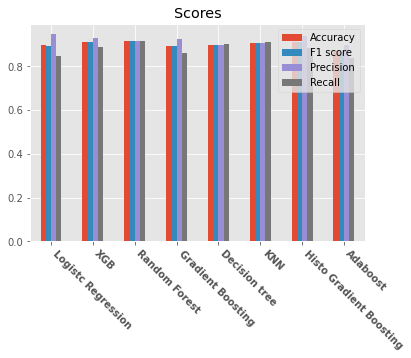

In [89]:
ax =scores.plot.bar()
ax
ax.set_xticklabels([
            "Logistc Regression",
            "XGB",
            "Random Forest",
            "Gradient Boosting",
            "Decision tree",
            "KNN",
            "Histo Gradient Boosting",
            "Adaboost",
        ])
ax.set_title('Scores')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", weight="bold")

plt.show()

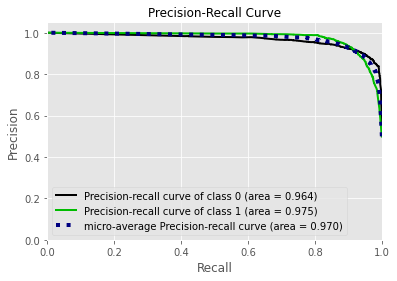

In [90]:
import scikitplot as skplt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

[00:42:58] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:42:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


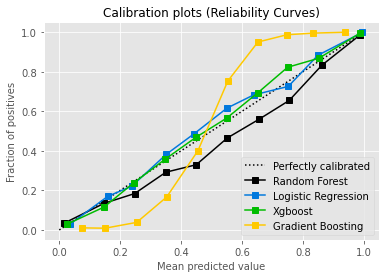

In [95]:
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier(verbose=0)
dt = GradientBoostingClassifier()
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
lr_probas = lr.fit(X_train, y_train).predict_proba(X_test)
nb_probas = xgb.fit(X_train, y_train).predict_proba(X_test)
svm_scores = dt.fit(X_train, y_train).decision_function(X_test)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
             'Xgboost', 'Gradient Boosting']
skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names)
plt.show()

Generates the Cumulative Gains Plot from labels and scores/probabilities

The cumulative gains chart is used to determine the effectiveness of a binary classifier

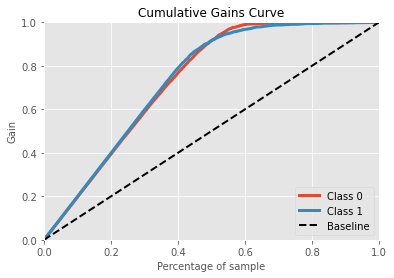

In [92]:
import scikitplot as skplt

lr = RandomForestClassifier()
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

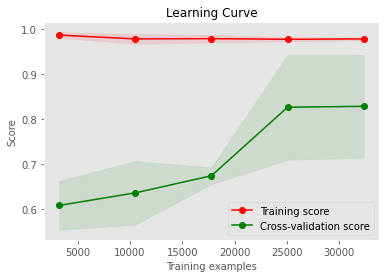

In [93]:
rf = RandomForestClassifier()
skplt.estimators.plot_learning_curve(rf, X, y)
plt.show()

<AxesSubplot:>

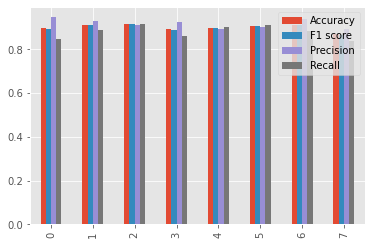

In [94]:
scores.plot.bar()